## Build a simple trading strategy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [3]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.read_csv('../data/facebook.csv',index_col=0)
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


### 2. Add "Shares" column to make decisions base on the strategy 

In [4]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

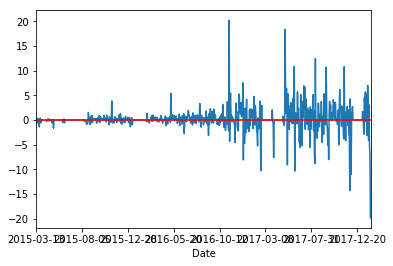

In [5]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [8]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


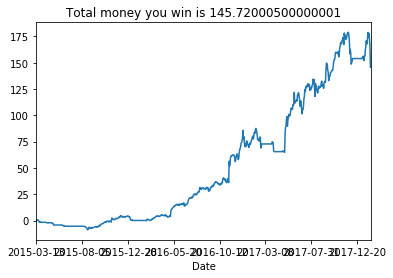

In [9]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).

In [10]:
ms = pd.read_csv('../data/microsoft.csv', index_col=0)

In [13]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [14]:
# we want to find the rolling average at 50 (slow) and 10 (fast)
ms['ma50'] = ms['Close'].rolling(50).mean()
ms['ma10'] = ms['Close'].rolling(10).mean()
ms = ms.dropna()

In [15]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,ma50,ma10
Date,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,44.0034,42.495
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,43.9056,42.263
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,43.8044,42.105
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,43.7278,42.049
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,43.6606,41.967


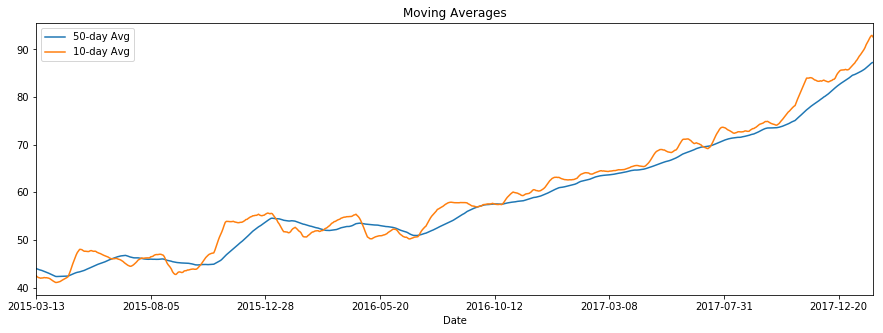

In [57]:
# lets plot the moving averages

plt.figure(figsize=(15,5))
ms['ma50'].plot(label='50-day Avg')
ms['ma10'].plot(label='10-day Avg')
plt.legend()
plt.title('Moving Averages')

In [26]:
#add a 'Shares' column to the datatable 1 if holding, 0 if not.
# condition to hold: if ma10 > ma50, keep

ms['Shares'] = [1 if ms.loc[i,'ma10'] > ms.loc[i,'ma50'] else 0 for i in ms.index]

In [31]:
#calculate profit from day to day
# close price of tomorrow - close price of today


#ms['Profit'] = [ms.loc[i,'Close'].shift(-1) - ms.loc[i,'Close'] if ms.loc[i,'Shares'] == 1 else 0 for i in ms.index]
# ^^ doesn't work becuase need to make tomorrow's close its own column
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[i,'Close1'] - ms.loc[i,'Close'] if ms.loc[i,'Shares'] == 1 else 0 for i in ms.index]

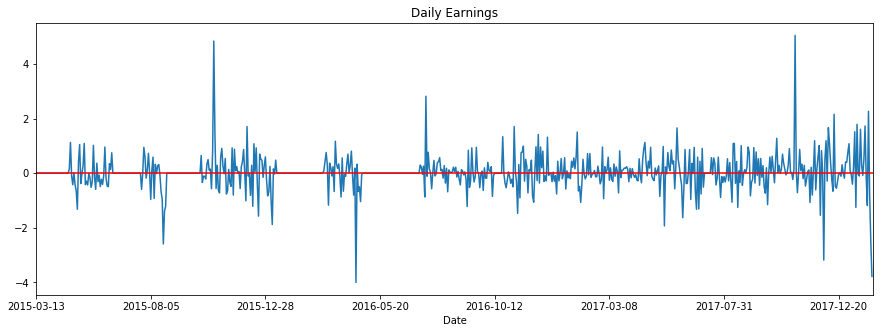

In [55]:
plt.figure(figsize=(15,5))
ms['Profit'].plot()
plt.axhline(y=0,color='red')
plt.title('Daily Earnings')

Initial Price: 41.380001
Final Price:   88.0
----------------------------------------------------
If longed the whole period without touching, earned:  46.619999
Total Earnings with ma10>ma50 Strategy:               23.530007


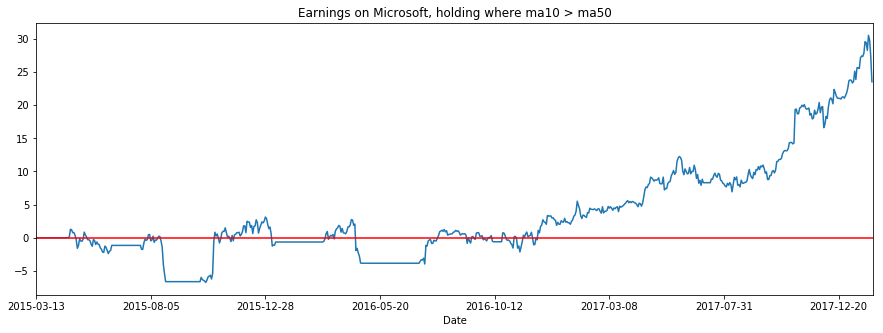

In [52]:
#plot out the cumulative sum, the amount of money earned through this strategy
ms['Wealth'] = ms['Profit'].cumsum()
plt.figure(figsize = (15,5))
ms['Wealth'].plot()
plt.axhline(y=0,color='red')
plt.title('Earnings on Microsoft, holding where ma10 > ma50')

In [54]:
print('Initial Closing Price:', ms['Close'].head()[0])
print('Final Closing Price:  ', ms['Close'].tail()[-1])
print('----------------------------------------------------')
print('If longed the whole period without touching, earned: ', ms['Close'].tail()[-1]-ms['Close'].head()[0])
print('Total Earnings with ma10>ma50 Strategy:              ', ms['Wealth'].tail()[-2])

Initial Closing Price: 41.380001
Final Closing Price:   88.0
----------------------------------------------------
If longed the whole period without touching, earned:  46.619999
Total Earnings with ma10>ma50 Strategy:               23.530007


##### Comments
* We see that we had a significantly lower return by employing this strategy compared to simply longing the stock for the whole observation period
* this indicates that the strategy might be problematic, though it would be interesting to see how it performs for a variety of stocks and if this strategy could limit risks in underperforming stocks